In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control import Antecedent, Consequent, Rule
from skfuzzy.control.visualization import FuzzyVariableVisualizer
from pydantic import BaseModel
from typing import Callable, Union

In [14]:
x_range = Antecedent(np.arange(-2000, 2000, 1), "x_range")
x_range["left"] = fuzz.zmf(x_range.universe, -2000.0, -650)
x_range["center"] = fuzz.gaussmf(x_range.universe, 0, 600.0)
x_range["right"] = fuzz.smf(x_range.universe, 650, 2000.0)

y_range = Antecedent(np.arange(-10, 2500, 1), "y_range")
y_range["close"] = fuzz.zmf(y_range.universe, 0, 2000)
y_range["far"] = fuzz.smf(y_range.universe, 1800, 2500)

output = Consequent(np.arange(-1, 1, 0.01), "output")
output["false"] = fuzz.gaussmf(output.universe, -1.0, 0.6)
output["true"] = fuzz.gaussmf(output.universe, 1.0, 0.6)
output.defuzzify_method = "centroid"

rules = [
    Rule(x_range["center"] & y_range["close"], output["true"]),
    Rule(x_range["center"] & y_range["far"], output["false"]),
    Rule(x_range["left"] & y_range["close"], output["false"]),
    Rule(x_range["left"] & y_range["far"], output["false"]),
    Rule(x_range["right"] & y_range["close"], output["false"]),
    Rule(x_range["right"] & y_range["far"], output["false"]),
    Rule(x_range["left"], output["false"]),
    Rule(x_range["right"], output["false"]),
]

_fis = ctrl.ControlSystem(rules=rules)
_fis_sim = ctrl.ControlSystemSimulation(_fis)


def infer(x: float, y: float) -> float:
    _fis_sim.input["x_range"] = x
    _fis_sim.input["y_range"] = y
    _fis_sim.compute()
    return _fis_sim.output["output"]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='x_range', ylabel='Membership'>)

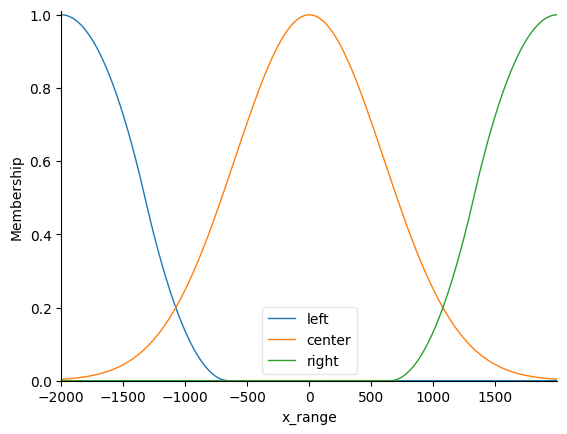

In [15]:
x_vis = FuzzyVariableVisualizer(x_range)
x_vis.view()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='y_range', ylabel='Membership'>)

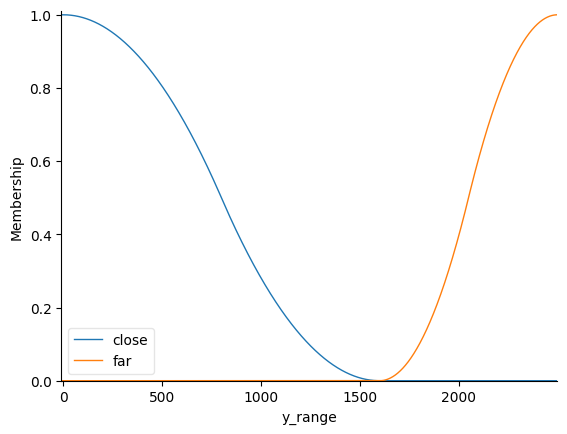

In [16]:
y_vis = FuzzyVariableVisualizer(y_range)
y_vis.view()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='output', ylabel='Membership'>)

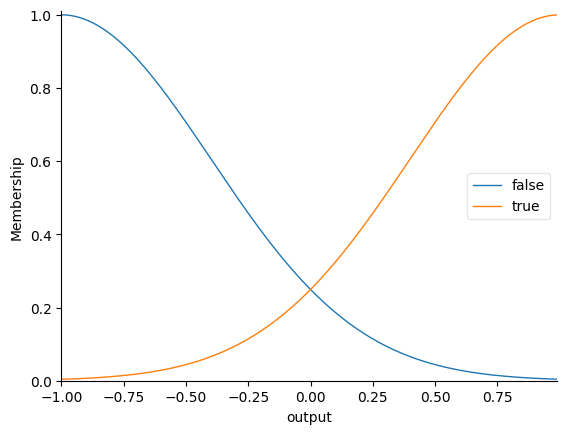

In [17]:
output_vis = FuzzyVariableVisualizer(output)
output_vis.view()

In [18]:
MAX_VAL = 0.522
MIN_VAL = -0.522

Num = Union[int, float]


def mapRange(x: Num, inMin: Num, inMax: Num, outMin: Num, outMax: Num) -> float:
    assert inMin < inMax, "inMin must be less than inMax"
    assert outMin < outMax, "outMin must be less than outMax"
    if x < inMin:
        return outMin
    if x > inMax:
        return outMax
    return (x - inMin) * (outMax - outMin) / (inMax - inMin) + outMin


val = infer(-1000, 0)
r = mapRange(val, MIN_VAL, MAX_VAL, -1, 1)
display(f"val: {val} -> {r}")

'val: 0.13844732668873272 -> 0.2652247637715186'